# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> There are two datasets in the [TMDb Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata/downloads/tmdb-5000-movie-dataset.zip/2#tmdb_5000_movies.csv) that provide information about 5000 movies collected from The Movie Database (TMDb) and movie credits data that includes user ratings and revenue.
>
> Attributes in each dataset:
- **tmdb_5000_movies.csv**
    - budget
    - genres
    - homepage
    - id
    - keywords
    - original_language
    - original_title
    - overview
    - popularity
    - production_companies
    - production_countries
    - release_date
    - revenue
    - runtime
    - spoken_languages
    - status
    - tagline
    - title
    - vote_average
    - vote_count
- **tmdb_5000_credits.csv**
    - movie_id
    - title
    - cast
    - crew

> Questions we may ask about the dataset:
- Do some movies from certain production companies attain more revenue when released in certain months of the year?
- What is the trend for movies from some production companies acheieving more popularity than others?
- How does genre affect movie revenue?
- Are more popular movies also better rated?
- Do some genres perform better when released in certain times of the month?
- Do highier vote averages correspond with highier revenue?
- Are genres that are produced the most more profitable than others?


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [58]:
# Load datasets
df_credits = pd.read_csv('tmdb_5000_credits.csv')
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [59]:
df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [60]:
#How many columns and rows exist in each dataset
df_credits.shape

(4803, 4)

In [61]:
df_movies.shape

(4803, 20)

We notice that the dataframe `df_credits` has just two extra columns that are missing in `df_movies` dataframe. We can check if the rows in both dataframes match. 

In [62]:
# check of rows match
(df_credits['title'] == df_movies['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

Since the rows in `df_credits` have the same movie title as rows in `df_movies`, we can now merge the two dataframes to make a `movies_df` dataframe.

In [63]:
# remove movie_id and title columns from df_credits df to avoid having duplicate columns
df_credits_new = df_credits.drop(["movie_id", "title"], axis=1)

# concatenate the two dataframes
movie_df = pd.concat([df_movies, df_credits_new], axis=1)
movie_df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


Let's create a new dataframe with columns we are only interested in.

In [64]:
# create new dataframe with columns we are only interested in.
new_columns = ['id', 'title', 'release_date', 'popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'genres',
              'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew', 'status']
df_movies = movie_df[new_columns]
df_movies.head(1)

,id,title,release_date,popularity,vote_average,vote_count,budget,revenue,genres,production_companies,production_countries,spoken_languages,cast,crew,status
0,19995,Avatar,2009-12-10,150.437577,7.2,11800,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Released


Now let's examine the data a little more closely and identify the incorrect datatypes, missing data, any dupliated rows or columns

In [65]:
# this returns a tuple of the dimensions of the dataframe
df_movies.shape

(4803, 15)

In [66]:
# this returns the datatypes of the columns
df_movies.dtypes

id                        int64
title                    object
release_date             object
popularity              float64
vote_average            float64
vote_count                int64
budget                    int64
revenue                   int64
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
cast                     object
crew                     object
status                   object
dtype: object

Some column datatypes have been returned as object. Let us examine them a little more closely to verify their datatype

In [67]:
# return datatype of title
type(df_movies['title'][0])

str

In [68]:
# return datatype of release_date
type(df_movies['release_date'][0])

str

In [69]:
# return datatype of genres
type(df_movies['genres'][0])

str

In [70]:
# return datatype of production_companies
type(df_movies['production_companies'][0])

str

In [71]:
# return datatype of spoken_languages
type(df_movies['spoken_languages'][0])

str

In [72]:
# return datatype of cast
type(df_movies['cast'][0])

str

In [73]:
# return datatype of crew
type(df_movies['crew'][0])

str

In [74]:
# return datatype of status
type(df_movies['status'][0])

str

First thing to note is that `release_date` has an incorrect datatype datatype of string instead of date and we should fix this in the next section.

Note: Columns `production_companies`, `genres`, `spoken_languages`, `cast` and `crew` are of a dictionary type although being returned as a string object and this makes it hard to read them. We shall destructure them later.

Now that we know the datatypes of our columns, let us find out columns and rows with missing data. We will treat `budget` column with values of 0 as missing

Our data frame has 4803 rows and 14 columns

In [75]:
# count null columns
null_columns=df_movies.columns[df_movies.isnull().any()]
df_movies[null_columns].isnull().sum()

release_date    1
dtype: int64

In [76]:
# print out the column with missing value
print(df_movies.iloc[4553, :])

id                                          380097
title                   America Is Still the Place
release_date                                   NaN
popularity                                       0
vote_average                                     0
vote_count                                       0
budget                                           0
revenue                                          0
genres                                          []
production_companies                            []
production_countries                            []
spoken_languages                                []
cast                                            []
crew                                            []
status                                    Released
Name: 4553, dtype: object


In [77]:
#To select rows whose budget value equals a 0
missing_budget = df_movies.budget == 0

# number of rows whose budget value equals a 0
print(missing_budget.sum())

1037


There is one column with missing value namely release_date,however, since we are treating all rows whose budget columns has a value of 0 as missing, we get a total of 1037 rows with missing data.

Now let us find any duplicated data in our data frame

In [78]:
# count of duplicated data
sum(df_movies.duplicated())

0

Woohooo! Our data set has no duplicated data.
We have assessed our data and now we can proceed to clean it in the next section.

### Data Cleaning 

We shall start with **cleaning missing data** 

We have two cases of missing data in the dataset. The first case is shown in `release_date` column that has a missing value indicated by NaN and the second case is shown in the budget and revenue columns that have values of 0. 

In the first case, we shall drop the row that has the missing value. This is not the best solution to deal with this. However, since we do not have any information on the release date and we can't necessarily use mean of the dates to fill in the missing value we shall opt to drop the row. 

The second case however, can be corrected with the mean. We shall fill all budget and revenue values of 0 with the mean.

In [79]:
# drop row with missing release_date value
df_movies.drop([4553], axis=0, inplace=True)

In [80]:
# this returns useful descriptive statistics for each column of data
df_movies.describe().round()

,id,popularity,vote_average,vote_count,budget,revenue
count,4802.0,4802.0,4802.0,4802.0,4802.0,4.802000e+03
mean,57098.0,21.0,6.0,690.0,29051088.0,8.227777e+07
std,88581.0,32.0,1.0,1235.0,40724474.0,1.628697e+08
min,5.0,0.0,0.0,0.0,0.0,0.000000e+00
25%,9014.0,5.0,6.0,54.0,800000.0,0.000000e+00
50%,14626.0,13.0,6.0,236.0,15000000.0,1.917498e+07
75%,58590.0,28.0,7.0,737.0,40000000.0,9.291920e+07
max,459488.0,876.0,10.0,13752.0,380000000.0,2.787965e+09


In [81]:
# budget mean
budget_mean = round(df_movies['budget'].mean())
print(budget_mean)

# revenue mean
revenue_mean = round(df_movies['revenue'].mean())
print(revenue_mean)

29051088
82277769


In [82]:
# replace budget values of 0 with the budget mean by masking
df_movies['budget'] = df_movies.budget.mask(df_movies.budget == 0,budget_mean)

# check to see if there are rows whose budget value equals a 0
df_movies.loc[df_movies['budget'] == 0]

# replace revenue values of 0 with the revenue mean by masking
df_movies['revenue'] = df_movies.revenue.mask(df_movies.revenue == 0,revenue_mean)

# check to see if there are rows whose budget value equals a 0
df_movies.loc[df_movies['revenue'] == 0]

/Users/victornomwesigwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/victornomwesigwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,title,release_date,popularity,vote_average,vote_count,budget,revenue,genres,production_companies,production_countries,spoken_languages,cast,crew,status


Next step in cleaning our data is **fixing incorrect datatypes** and this is observed on `release_date` which is string type instead datetime type

In [83]:
# change to datetime datatype
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# cross check the datatype to ensure that the change was correctly implemented
type(df_movies['release_date'][0])

/Users/victornomwesigwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pandas._libs.tslibs.timestamps.Timestamp

The next step of our data cleaning is improving the data structure where we shall convert json dictionaries into string for the columns we are mostly interested in i.e.: `production_companies, production_countries, genres, spoken_languages`

In [84]:
# changing production_companies column to string
df_movies['production_companies'] = df_movies['production_companies'].apply(json.loads)
for index,i in zip(df_movies.index,df_movies['production_companies']):
    production_list = []
    for j in range(len(i)):
        production_list.append((i[j]['name']))
    df_movies.loc[index,'production_companies']=str(production_list)
    df_movies.head()
    
# changing production_countries column to string
df_movies['production_countries'] = df_movies['production_countries'].apply(json.loads)
for index,i in zip(df_movies.index,df_movies['production_countries']):
    production_count_list = []
    for j in range(len(i)):
        production_count_list.append((i[j]['name']))
    df_movies.loc[index,'production_countries']=str(production_count_list)

# changing genres column to string
df_movies['genres'] = df_movies['genres'].apply(json.loads)
for index,i in zip(df_movies.index,df_movies['genres']):
    genres_list = []
    for j in range(len(i)):
        genres_list.append((i[j]['name']))
    df_movies.loc[index,'genres']=str(genres_list)
    
# changing spoken_languages column to string
df_movies['spoken_languages'] = df_movies['spoken_languages'].apply(json.loads)
for index,i in zip(df_movies.index,df_movies['spoken_languages']):
    spoken_languages_list = []
    for j in range(len(i)):
        spoken_languages_list.append((i[j]['name']))
    df_movies.loc[index,'spoken_languages']=str(spoken_languages_list)
    df_movies.head()

/Users/victornomwesigwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/victornomwesigwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/victornomwesigwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [85]:
# check the head to see if the changes were applied
df_movies.head()

,id,title,release_date,popularity,vote_average,vote_count,budget,revenue,genres,production_companies,production_countries,spoken_languages,cast,crew,status
0,19995,Avatar,2009-12-10,150.437577,7.2,11800,237000000,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']","['English', 'Español']","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Released
1,285,Pirates of the Caribbean: At World's End,2007-05-19,139.082615,6.9,4500,300000000,961000000,"['Adventure', 'Fantasy', 'Action']","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],['English'],"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Released
2,206647,Spectre,2015-10-26,107.376788,6.3,4466,245000000,880674609,"['Action', 'Adventure', 'Crime']","['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']","['Français', 'English', 'Español', 'Italiano',...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Released
3,49026,The Dark Knight Rises,2012-07-16,112.312950,7.6,9106,250000000,1084939099,"['Action', 'Crime', 'Drama', 'Thriller']","['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],['English'],"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Released
4,49529,John Carter,2012-03-07,43.926995,6.1,2124,260000000,284139100,"['Action', 'Adventure', 'Science Fiction']",['Walt Disney Pictures'],['United States of America'],['English'],"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Released


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### Research Question 1 - Are more popular movies also better rated?

Find the highest popularity count

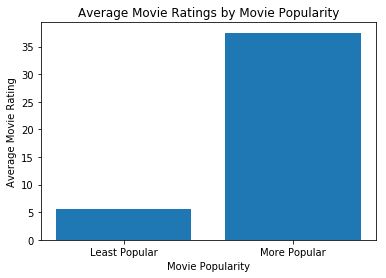

In [86]:
# Are more popular movies better rated?
# Use query to select each group and get its mean vote_count
median = df_movies['popularity'].median()
low = df_movies.query('popularity < {}'.format(median))
high = df_movies.query('popularity >= {}'.format(median))

mean_vote_count_low = low['vote_count'].mean()
mean_vote_count_high = high['vote_count'].mean()

# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_popularity_low, mean_popularity_high]
labels = ['Least Popular', 'More Popular']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Movie Ratings by Movie Popularity')
plt.xlabel('Movie Popularity')
plt.ylabel('Average Movie Rating');

### Research Question 2 - Are genres that are produced the most more profitable than others?

In [99]:
# create a new data set after creating a row for each genre element in the list matching for every movie
df_movies_genre = df_movies.set_index(['id','title','budget', 'revenue', 'popularity'])['genres'].apply(pd.Series).stack()
df_movies_genre = df_movies_genre.reset_index()
df_movies_genre.columns = ['id','title','budget', 'revenue', 'popularity', 'sample_from_genre_list', 'genre']
df_movies_genre.head()

,id,title,budget,revenue,popularity,sample_from_genre_list,genre
0,19995,Avatar,237000000,2787965087,150.437577,0,Action
1,19995,Avatar,237000000,2787965087,150.437577,1,Adventure
2,19995,Avatar,237000000,2787965087,150.437577,2,Fantasy
3,19995,Avatar,237000000,2787965087,150.437577,3,ScienceFiction
4,285,Pirates of the Caribbean: At World's End,300000000,961000000,139.082615,0,Adventure


In [111]:
# Find the total count for each genre
df_movies_genre.genre.value_counts()

Drama             2297
Comedy            1722
Thriller          1274
Action            1154
Romance            894
Adventure          790
Crime              696
ScienceFiction     535
Horror             519
Family             513
Fantasy            424
Mystery            348
Animation          234
History            197
Music              185
War                144
Documentary        110
Western             82
Foreign             34
                    27
TVMovie              8
Name: genre, dtype: int64

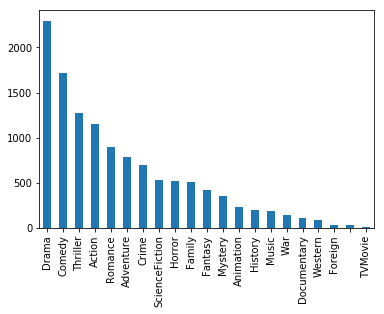

In [112]:
df_movies_genre.genre.value_counts().plot(kind="bar")

In [108]:
# calculate profit for each movie.
df_movies_genre['profit'] = df_movies_genre['revenue'] - df_movies_genre['budget']
df_movies_genre.head()

,id,title,budget,revenue,popularity,sample_from_genre_list,genre,profit
0,19995,Avatar,237000000,2787965087,150.437577,0,Action,2550965087
1,19995,Avatar,237000000,2787965087,150.437577,1,Adventure,2550965087
2,19995,Avatar,237000000,2787965087,150.437577,2,Fantasy,2550965087
3,19995,Avatar,237000000,2787965087,150.437577,3,ScienceFiction,2550965087
4,285,Pirates of the Caribbean: At World's End,300000000,961000000,139.082615,0,Adventure,661000000


In [163]:
df = df_movies_genre.groupby(['genre'], as_index=False)['profit'].mean()
df

,genre,profit
0,,5.440814e+07
1,Action,1.014609e+08
2,Adventure,1.516996e+08
3,Animation,1.711186e+08
4,Comedy,6.522592e+07
5,Crime,5.288132e+07
6,Documentary,4.004688e+07
7,Drama,5.188591e+07
8,Family,1.268036e+08
9,Fantasy,1.408761e+08


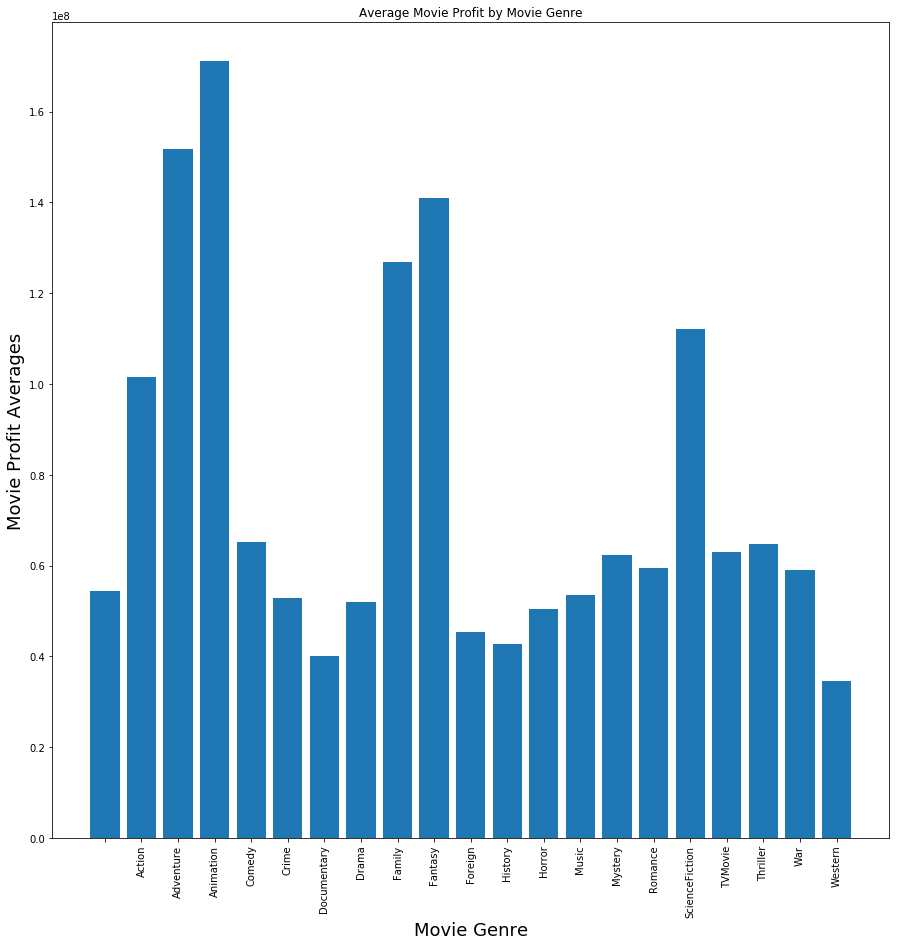

In [164]:
plt.subplots(figsize=(15, 15))
plt.bar(df.genre, df.profit)
plt.title('Average Movie Profit by Movie Genre')
plt.xlabel('Movie Genre', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Movie Profit Averages', fontsize=18);

<a id='conclusions'></a>
## Conclusions

> In conclusion, it is true that more popular movies receive better ratings than least popular movies.
> We also observe that genres like drama, comedy, and thriller which are the 3 top most produced genres in movies are not necessarily more profitable than animation, adventure and fantasy which are the most profitable genres.
